# 11.5 Capstone 2 Exploratory Data Analysis (EDA) <a id='11_5_Capstone_2_Exploratory_Data_Analysis'></a>

  * [11.5.1 Recap Of Summaries Of Previous Notebooks](#11.5.1_Recap_Of_Summaries_Of_Previous_Notebooks)
  * [11.5.2 Imports](#11.5.2_Imports)
  * [11.5.3 Functions_Created](#11.5.3_Functions_Created)
  * [11.5.4 Load The Study Data_After_Data_Wrangling](#11.5.4_Load_The_Study_Data_After_Data_Wrangling)
  * [11.5.5 Explore The Data](#11.5.5_Explore_The_Data)
  * [11.5.6 Save Data](#11.5.6_Save_Data)
  * [11.5.7 Summary](#11.5.7_Summary)


# 11.5.1 Recap Of Summaries Of Previous Notebooks <a id='11.5.1_Recap_Of_Summaries_Of_Previous_Notebooks'></a>

Goal: Predict likelihood of early stage diabetes based on various symptoms

The dataset includes the gender, age and 14 symptoms of a newly diabetic or would-be diabetic patient and whether they tested positive or negative for diabetes.  (Note - gender and age will be referred to as symptoms - making a total of 16 "symptoms" for testing.  There are 520 rows of data (data-wrangling notebook incorrectly said 550 at top, although showed 520 when working through data).  The aim is to build a model to predict whether a subject providing that data would be more likely to test positive or negative for diabetes.
(Note from the website source: The dataset was collected using direct questionnaires from the patients of Sylhet Diabetes
Hospital in Sylhet, Bangladesh and approved by a doctor).

Definitions of some symptoms:
polyuria:  production of abnormally large volumes of dilute urine.
polydipsia:  abnormally great thirst as a symptom of disease (such as diabetes) or psychological disturbance.
polyphagia:  also known as hyperphagia, is the medical term for excessive or extreme hunger. It's different than having an increased appetite after exercise or other physical activity. While your hunger level will return to normal after eating in those cases, polyphagia won't go away if you eat more food.
alopecia:  alopecia areata is a condition that causes hair to fall out in small patches, which can be unnoticeable. These patches may connect, however, and then become noticeable. The condition develops when the immune system attacks the hair follicles, resulting in hair loss.
partial paresis:  paresis involves the weakening of a muscle or group of muscles. It may also be referred to as partial or mild paralysis. Unlike paralysis, people with paresis can still move their muscles. These movements are just weaker than normal. Paresis occurs when nerves are damaged.

The link to the UCI Machine Learning Repository dataset is:
https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.
(Note - the period is part of the link).

Related citations are:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
Islam, MM Faniqul, et al. 'Likelihood prediction of diabetes at early stage using data mining techniques.' Computer Vision and Machine Intelligence in Medical Image Analysis. Springer, Singapore, 2020. 113-125.

Data Wrangling revealed:
The given data had no missing values and was almost all boolean. Only age was not. Two different kinds of categorical age columns was made from the age column, as well as a binary version based on a range, based on two categories of the four category version that had a relatively high percentage of subjects in those age groups having diabetes_found.

The symptoms that seem to be most important separately and together are: 'polyuria', 'polydipsia', 'weakness', and 'partial_paresis'. That will be kept in mind although, since there are only 16 symptoms all together, they will probably all be looked at. Categorical-based algorithms will be explored because of the nature of the data.

Results:
320 of 520 subjects tested positive for diabetes
113 of 320 (35%) had all of the top four symptoms: 'polyuria', 'polydipsia', 'weakness', 'partial_paresis'
155 of 320 (48%) had all of the top three symptoms: 'polyuria', 'polydipsia', 'weakness'
193 of 320 (60%) had both of the top two symptoms: 'polyuria', 'polydipsia'

## 11.5.2 Imports<a id='11.5.2_Imports'></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from library.sb_utils import save_file

## 11.5.3 Functions Created<a id='11.5.3_Functions_Created'></a>

In [2]:
# Heatmap with desired features, including applying correlationon to given dataframe and cosmetic features
# Parameters are df (dataframe to plot), title (plot title with default available) and cmap_in (cmap with default available)
def pretty_heatmap(df, title='Compare Symptoms', cmap_in="Blues"):
    corrmat = df.corr()
    f, ax = plt.subplots(figsize=(12, 9))
    hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap=cmap_in,fmt='.2f',
                 linewidths=.05)
    f.subplots_adjust(top=0.93)
    t= f.suptitle(title, fontsize=14)

## 11.5.4 Load The Study Data After Data Wrangling<a id='11.5.4_Load_The_Study_Data_After_Data_Wrangling'></a>

In [3]:
# The original CSV data file downloaded from UCI, diabetes_data_upload.csv is in the raw_data directory
# Re-load useful files from data wrangling put in data directory
datapath = '../data'
# Boolean version of 'Yes'/'No' valued columns using 1/0 instead of True/False to allow for summing (and minor other data cleanup)
df_boolean = pd.read_csv('../data/df_boolean.csv')
# Version of df_boolean with only those with diabetes_found = 0
df_boolean_diabetes_found = pd.read_csv('../data/df_boolean_diabetes_found.csv')
# Version of df_boolean with only those with diabetes_found = 1 and additional age fields added, including boolean
df_boolean_diabetes_not_found = pd.read_csv('../data/df_boolean_diabetes_not_found.csv')
# Total for each symptom for those with diabetes_found
df_diabetes_found_totals = pd.read_csv('../data/df_diabetes_found_totals.csv')
# Total for each symptom for those with diabetes_found, sorted descending based on total
# With additional fields symptom_importance and symptom_str
df_diabetes_found_totals_sorted = pd.read_csv('../data/df_diabetes_found_totals_sorted.csv')
# Binary version of symptoms sorted by importance for each subject with diabetes_found
df_substr_binary_list_diabetes_found = pd.read_csv('../data/df_substr_binary_list_diabetes_found.csv')
# Binary version of first 7 symptoms sorted by importance for each subject with diabetes_found
df_substr_binary_list_diabetes_found_7 = pd.read_csv('../data/df_substr_binary_list_diabetes_found_7.csv')
# Binary version of first 3 symptoms sorted by importance for each subject with diabetes_found
df_substr_binary_list_diabetes_found_3 = pd.read_csv('../data/df_substr_binary_list_diabetes_found_3.csv')
# Binary version of first 2 symptoms sorted by importance for each subject with diabetes_found
df_substr_binary_list_diabetes_found_2 = pd.read_csv('../data/df_substr_binary_list_diabetes_found_2.csv')
# Version of df_boolean_diabetes_found with all non-boolean fields removed
df_boolean_only_diabetes_found = pd.read_csv('../data/df_boolean_only_diabetes_found.csv')

In [4]:
# Other variables derived from dataframes read from .csvs
column_list_boolean_sorted = list(df_diabetes_found_totals_sorted.symptom)
# Totals of who did and did not have symptoms among those with diabetes - column for each symptom, row 0 
# containing total among those with diabetes did not have symptom and row 1 for total of hose with diabetes who did have
# symptom
df_boolean_only_diabetes_found_totals = df_boolean_only_diabetes_found.apply(pd.value_counts)

In [5]:
# Get basic info about data
df_boolean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  520 non-null    int64 
 1   is_male              520 non-null    int64 
 2   polyuria             520 non-null    int64 
 3   polydipsia           520 non-null    int64 
 4   sudden_weight_loss   520 non-null    int64 
 5   weakness             520 non-null    int64 
 6   polyphagia           520 non-null    int64 
 7   genital_thrush       520 non-null    int64 
 8   visual_blurring      520 non-null    int64 
 9   itching              520 non-null    int64 
 10  irritability         520 non-null    int64 
 11  delayed_healing      520 non-null    int64 
 12  partial_paresis      520 non-null    int64 
 13  muscle_stiffness     520 non-null    int64 
 14  alopecia             520 non-null    int64 
 15  obesity              520 non-null    int64 
 16  diabetes

In [6]:
# Examine some data
df_boolean.head()

,age,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes_found,age_qcut_4,age_qcut_10,age_over_47_point_5
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,"(39.0, 47.5]","(37.0, 40.0]",0
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,"(57.0, 90.0]","(55.0, 58.0]",1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,"(39.0, 47.5]","(40.0, 44.0]",0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,"(39.0, 47.5]","(44.0, 48.0]",0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,"(57.0, 90.0]","(58.0, 65.0]",1


In [7]:
df_boolean.describe()

,age,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes_found,age_over_47_point_5
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385,0.500000
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973,0.500481
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 11.5.5 Explore The Data<a id='11.5.5_Explore_The_Data'></a>

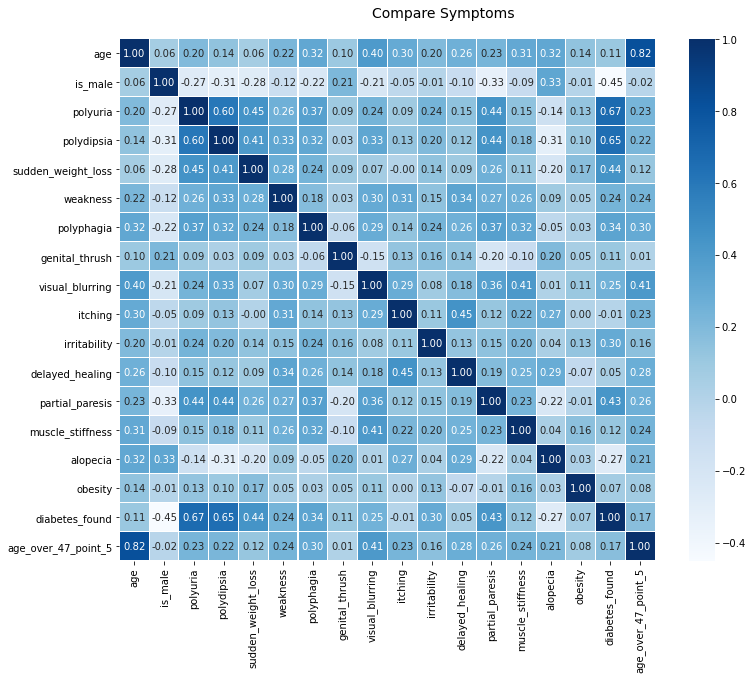

In [8]:
pretty_heatmap(df_boolean)
# Ignoring the correlations with diabetes_found, for the moment, and ignoring how the the two age columns
# correlate with each other, look at the correlation between other symptoms to see if it appears
# that there are high correlations whereby only one of the two should be included.
# Polyuria and polydipsia have a 0.60 correlation, but that is not strong enough to not include both.  There are 
# notable, but even less correlation (0.40-0.45) between polyuria and partial_paresis (0.44), 
# polydipsia and partial_paresis (0.44), itching and delayed_healing (0.45), and visual_blurring with age and
# age_over_47_point_5 (0.40 and 0.41, respectively).

<AxesSubplot:xlabel='age', ylabel='Count'>

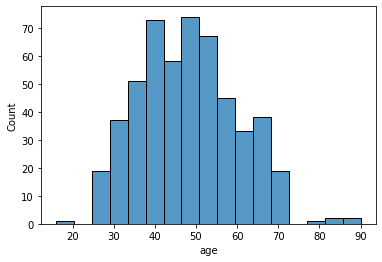

In [9]:
# Although age and age_over_47_point_5 do not have high correlations, is there a better age boolean to use?
sns.histplot(x='age', data=df_boolean)

<AxesSubplot:xlabel='age', ylabel='Count'>

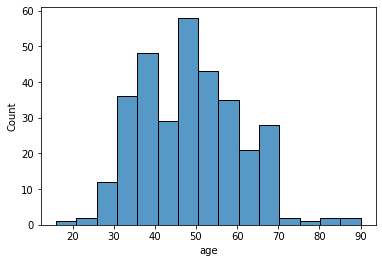

In [10]:
sns.histplot(x='age', data=df_boolean_diabetes_found)

<AxesSubplot:xlabel='age', ylabel='Count'>

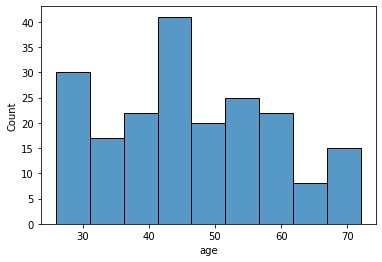

In [11]:
sns.histplot(x='age', data=df_boolean_diabetes_not_found)

In [12]:
df_category= df_boolean.copy()
df_category['age_between_45_60'] = np.where((df_category['age'] >= 45) & (df_category['age'] <=60), 1, 0)
df_category['age_between_50_60'] = np.where((df_category['age'] >= 50) & (df_category['age'] <=60), 1, 0)
df_category.head()

,age,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,...,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes_found,age_qcut_4,age_qcut_10,age_over_47_point_5,age_between_45_60,age_between_50_60
0,40,1,0,1,0,1,0,0,0,1,...,0,1,1,1,1,"(39.0, 47.5]","(37.0, 40.0]",0,0,0
1,58,1,0,0,0,1,0,0,1,0,...,1,0,1,0,1,"(57.0, 90.0]","(55.0, 58.0]",1,1,1
2,41,1,1,0,0,1,1,0,0,1,...,0,1,1,0,1,"(39.0, 47.5]","(40.0, 44.0]",0,0,0
3,45,1,0,0,1,1,1,1,0,1,...,0,0,0,0,1,"(39.0, 47.5]","(44.0, 48.0]",0,1,0
4,60,1,1,1,1,1,1,0,1,1,...,1,1,1,1,1,"(57.0, 90.0]","(58.0, 65.0]",1,1,1


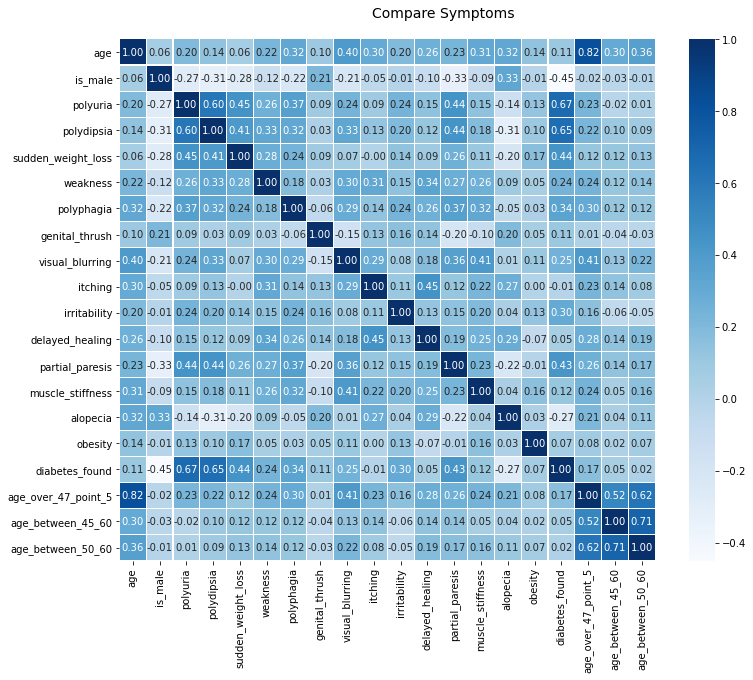

In [13]:
pretty_heatmap(df_category)
# Looking at the new boolean age columns (age_between_45_60 and age_between_50_60), their correlation with diabetes_found 
# is even less than the age_over_47_point_5 column.  Although age_over_47_point_5 column still has a low correlation
# with diabetes_found, it is still better than age_between_45_60 and age_between_50_60 and much better than the 
# pure age column.   It was also the 7th most prevalent symptom of the 16 found among those with diabetes durling data 
# wrangling.  Thus, for future analysis, this column will be used.

In [14]:
# There is a negative correlation between is_male and diabetes_found, thus implying a correlation between female and 
# found
# Look at counts of male (is_male=1) vs female (is_male=0) for entire dataset.
df_boolean['is_male'].value_counts()

1    328
0    192
Name: is_male, dtype: int64

In [15]:
# Look at counts of male (is_male=1) vs female (is_male=0) for diabetes_found=1 in dataset.
# Thus 173/192 female with diabetes_found and 147/328 male with diabetes_found.
df_boolean_diabetes_found['is_male'].value_counts()

0    173
1    147
Name: is_male, dtype: int64

In [16]:
# Reminder from data wrangling
# Column list of boolean symptoms in importance (prevalence in those with diabetes_found) order 
# (column diabetes_found removed)
print(column_list_boolean_sorted)
# ['polyuria', 'polydipsia', 'weakness', 'partial_paresis', 'polyphagia', 'sudden_weight_loss', , 'age_over_47_point_5',
# 'visual_blurring', 'itching', 'delayed_healing', 'is_male', 
# 'muscle_stiffness', 'irritability', 'genital_thrush', 'alopecia', 'obesity']

['polyuria', 'polydipsia', 'weakness', 'partial_paresis', 'polyphagia', 'sudden_weight_loss', 'age_over_47_point_5', 'visual_blurring', 'itching', 'delayed_healing', 'is_male', 'muscle_stiffness', 'irritability', 'genital_thrush', 'alopecia', 'obesity']


In [17]:
# Reminder from data wrangling
print(df_boolean_only_diabetes_found_totals)

   is_male  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
0      173        77          95                 132       102         131   
1      147       243         225                 188       218         189   

   genital_thrush  visual_blurring  itching  irritability  delayed_healing  \
0             237              145      166           210              167   
1              83              175      154           110              153   

   partial_paresis  muscle_stiffness  alopecia  obesity  age_over_47_point_5  
0              128               185       242      259                  139  
1              192               135        78       61                  181  


In [18]:
#df_substr_binary_list_diabetes_found_3.value_counts()

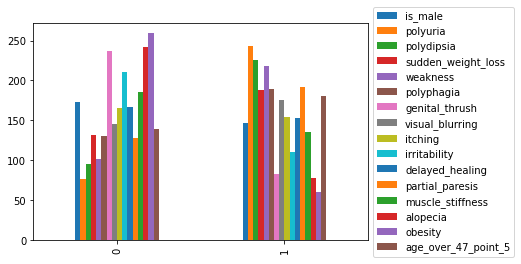

In [19]:
# Reminder from data wrangling
# Graph of prevalence of various symptoms
# Total of 320 with diabetes_found, 1 if has symptom, 0 if does not
df_boolean_only_diabetes_found_totals.plot.bar().legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

In [20]:
age_columns_to_exclude = ['age', 'age_qcut_4', 'age_qcut_10']
df_from_eda = df_boolean.copy()
df_from_eda.drop(columns=age_columns_to_exclude, inplace=True) 

In [21]:
df_from_eda.head()

,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes_found,age_over_47_point_5
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1


## 11.5.6 Save Data<a id='11.5.6_Save_Data'></a>

In [22]:
# Save various dataframes created in this notebook as csv files in /data subdirectory
datapath = '../data'

In [23]:
# Output a dataframe age experimentation columns, just in case, although probably won't be used
save_file(df_category, 'df_category.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)n

Please re-run this cell with a new filename.


In [24]:
# Output a dataframe with all 16 symptoms as boolean, keeping only age_over_47_point_5 as an age field
save_file(df_from_eda, 'df_from_eda.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)n

Please re-run this cell with a new filename.


## 11.5.7 Summary<a id='11.5.7_Summary'></a>

There are 16 symptoms being considered in this dataset.  It should be noted that the dataset comes from one non-US hospital and are not a general population (see data source in "Recap Of Data Science Problem and Data Wrangling Summaries" above).  

Furthermore, there are certain symptoms that are not well represented.  For example, obesity and diabetes are shown to be very correlated by many studies (https://www.diabetesselfmanagement.com/about-diabetes/types-of-diabetes/type-2-diabetes-and-obesity-the-link/). However, in this full population sample, with or without diabetes, there are only 88 of 520 subjects that have obesity as a symptom.  

Thus, it is hard to imagine that this dataset will produce a model that accurately predicts results for a US or worldwide population.  However, the aim will be to make a good predictor for a population similar to the one given.   

The best way to represent age as a boolean was explored in more detail in this notebook because age has a known correlation with diabetes (https://www.webmd.com/diabetes/diabetes-link-age).  Again, this is a specific dataset population and, although the details of how this data source was obtained is unknown from the limited information on the website, it could be speculated that people of all ages that doctors suspected might have diabetes based on having at least one symptom were thus tested, as opposed to sampling made to represent the general population.

There was also a moderate negative correlation (-0.45) with 'is_male', which implies a moderate correlation with the
gender being female.  Thus, is_male should be included in this model.  Note, however that this correlation also goes against reported greater prevalence of diabetes in males compared to females.  (https://www.americashealthrankings.org/explore/annual/measure/Diabetes/state/ALL).  

Similarly, about the gender correlation:  In this dataset, there were 328 males and 147 of them had diabetes.  On the other hand, there were 192 females and 173 of them had diabetes!  This might mean that the correlation only relates to how men and women were each chosen to be in this dataset.  Again, based on this and what was mentioned about other symptoms above,  this dataset clearly does not match a general population, again showing that the model created will only be predictive for a population that meets some unknown criteria (potentially as narrow as "patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor", but hopefully much more general, such as "third world patients"). However, it will still be interesting to discover how good a model could be made from this dataset, no matter how narrow its usefulness.

Although, as determined during data wrangling, there are some symptoms that have a much higher correlation with a diabetes diagnosis than others, since there are only 16 symptoms altogether and, although there are some moderate correlations, there are no strong correlations between any two of them. Thus, keeping all of them in an initial model would probably be a good starting place.  That model could then be compared with other models where some symptoms that are less correlated with diabetes being found are excluded. 

Just to remind from data wrangling, the top seven most prevalent symptoms that appear in those that had diabetes were (from most prevalent to least of top seven): 'polyuria', 'polydipsia', 'weakness', 'partial_paresis', 'polyphagia', 'sudden_weight_loss', 'age_over_47_point_5'.  From the orrelation heatmap of full population above, the top seven of those with the greatest correlation with 'diabetes_found' were:  'polyuria' (0.67), 'polydipsia'(0.65), 'is_male' (-0.45), 'sudden_weight_loss'(0.44), 'partial_paresis'(0.43),  'polyphagia'(0.34), 'irritability'(0.30), 'visual blurring'(0.25).  